# Partition On Disk

Spark/PySpark partitioning is a way to split the data into multiple partitions so that you can execute transformations on multiple partitions in parallel which allows completing the job faster. You can also write partitioned data into a file system (multiple sub-directories) for faster reads by downstream systems.

we have two different types of partitions.
1. In Memory Partition.
2. Partition On Disk.

In Memory Partition comes in picture when we read any data from the Data source.
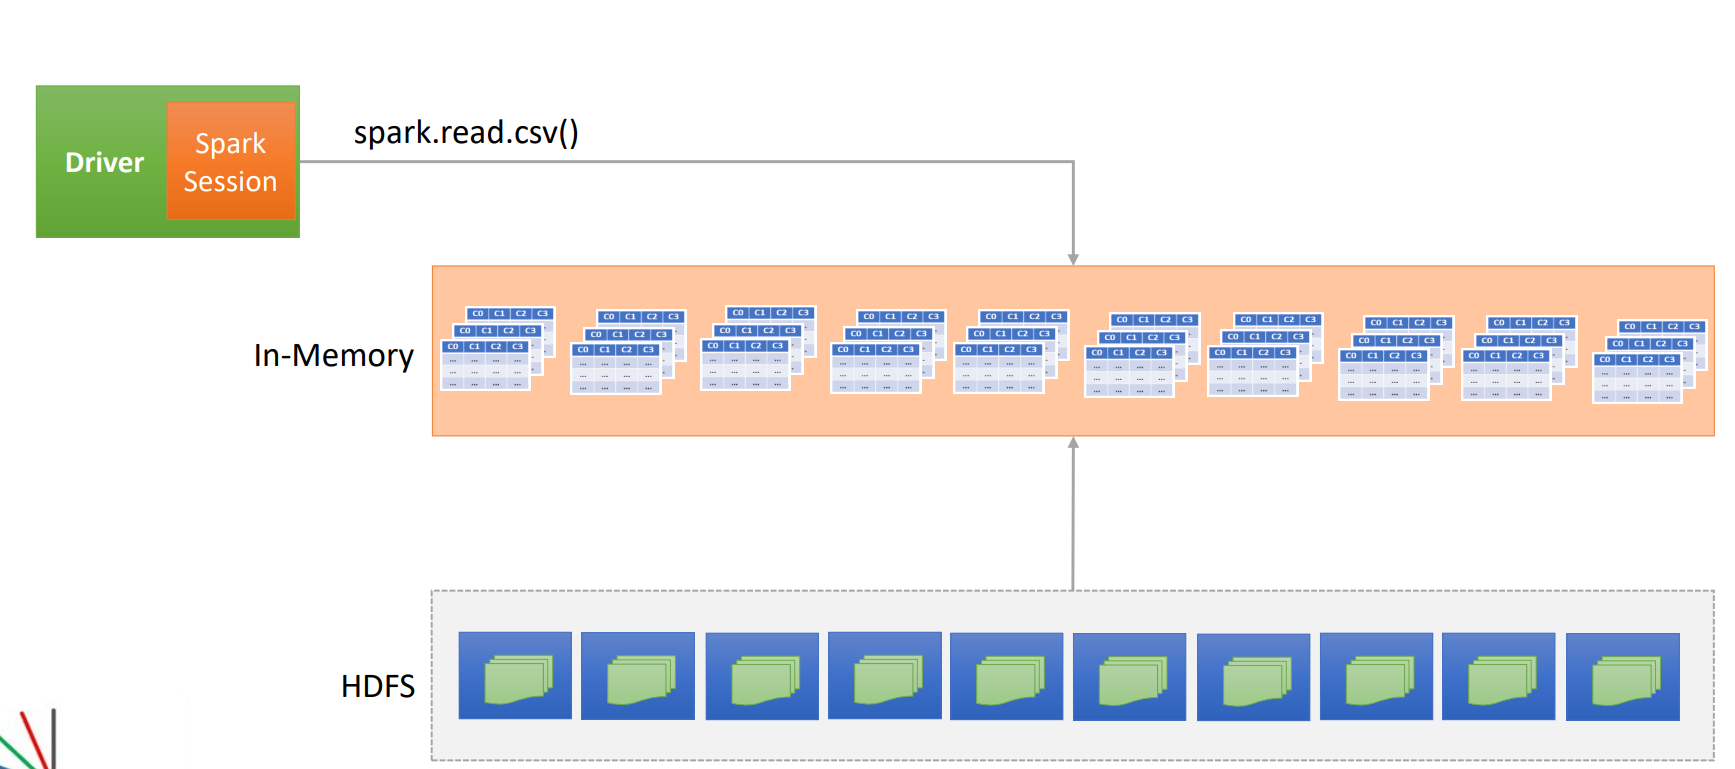

After reading file we will might perform several operations on the data and then store it in Disk.
Here in this Document we will discuss about the partiton on disk.

#### We have two different ways for partition on disk <code>partitionby()</code> and <code>partitionbyrange()</code>.

# <code>partitionby()</code>

Spark partitionBy() is a function of <code>pyspark.sql.DataFrameWriter</code> class which is used to partition based on one or multiple column values while writing DataFrame to Disk/File system.

When you write Spark DataFrame to disk by calling <code>partitionBy()</code>, PySpark splits the records based on the partition column and stores each partition data into a sub-directory.

# Read/Transformations then save on disk.

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .appName("PartitionExample.com") \
        .master("local[4]") \
        .getOrCreate()

df_file = spark.read.csv("../Data/spacex_launches.csv", header=True, inferSchema=True)

Here we have read the file and suppose we have performed some Transformation.

Now I am going to store the dataframe.

When using partitionBy(), you have to be very cautious with the number of partitions it creates, as having too many partitions creates too many sub-directories in a directory which brings unnecessarily and overhead to NameNode (if you are using Hadoop) since it must keep all metadata for the file system in memory.

In [2]:
df_file.select("Orbit").distinct().show()

+-----+
|Orbit|
+-----+
|  SSO|
| VLEO|
|   SO|
|ES-L1|
|  LEO|
|   PO|
|  GEO|
|  GTO|
|  MEO|
|  HEO|
|  ISS|
+-----+



 From Above have a SpaceX table that contains the data of past launches with Outcome,Rocket, and other columns. Creating a partition on the Outcome, splits the table into around 11 partitions.
 
 If we write the data by partitioning on the basis of Outcome it will store it in 11 different partitions.
 
 
 **Let's See The Code**

In [1]:
df_file.write.option("header",True) \
        .partitionBy("Orbit") \
        .mode("overwrite") \
        .csv("FileStore/spaceX/launches_outcomes")

On our DataFrame, we have a total of 11 different states hence, it creates 11 directories as shown below. The name of the sub-directory would be the partition column and its value (partition column=value).

The directory structure look like:
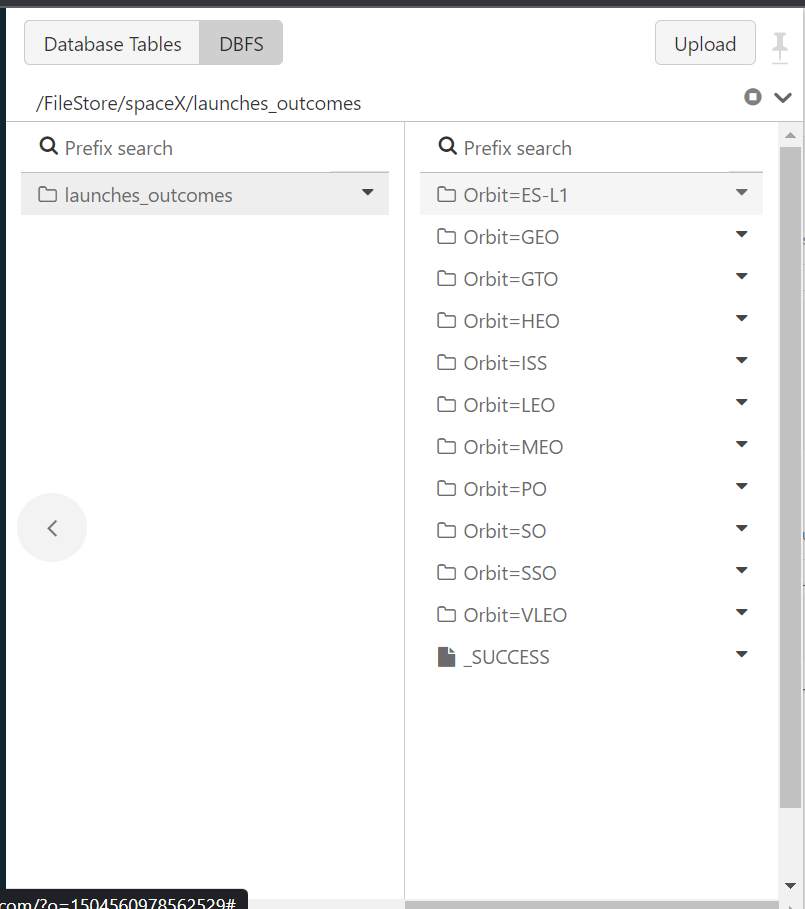

### Inside each folder it will look like

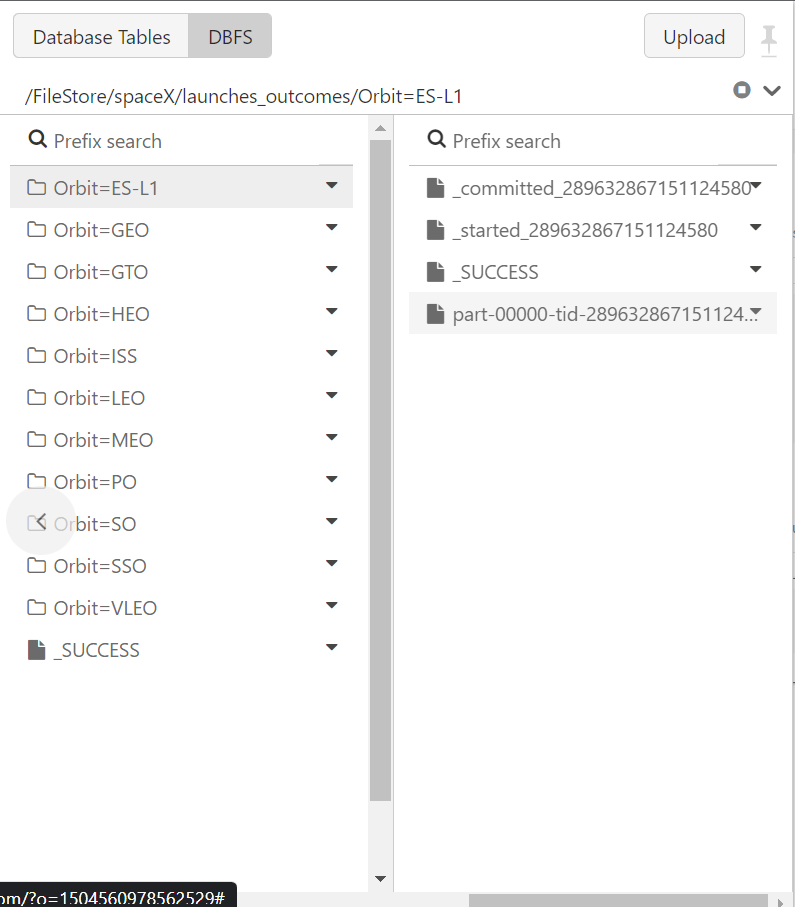

Now in above we can se that for each orbit we have different set of records.
In folder you see a file **dbfs:/FileStore/spaceX/launches_outcomes/Orbit=ES-L1/part-00000-tid-289632867151124580-cb356b73-51eb-4a91-aba1-d12decdd7de4-4-1.c000.csv**


This File contain all the records where <code>Orbit</code> value is equal to <code>ES-L1</code>

This is how partition works in Apache spark.